In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
df= pd.read_csv('DC_Properties.csv')

C:\Users\MR_SA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [6]:
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [8]:
df = df.drop(['AC','HEAT','SALEDATE','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL'],axis=1)

In [9]:
df = df.drop(['ROOF','INTWALL','GIS_LAST_MOD_DTTM','SOURCE','FULLADDRESS','CITY','STATE','NATIONALGRID'],axis=1)

In [10]:
df = df.drop(['ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','WARD','SQUARE','QUADRANT'],axis= 1)

In [11]:
df.dtypes

Unnamed: 0        int64
BATHRM            int64
HF_BATHRM         int64
NUM_UNITS       float64
ROOMS             int64
BEDRM             int64
AYB             float64
YR_RMDL         float64
EYB               int64
STORIES         float64
PRICE           float64
SALE_NUM          int64
GBA             float64
BLDG_NUM          int64
KITCHENS        float64
FIREPLACES        int64
USECODE           int64
LANDAREA          int64
CMPLX_NUM       float64
LIVING_GBA      float64
ZIPCODE         float64
LATITUDE        float64
LONGITUDE       float64
CENSUS_TRACT    float64
X               float64
Y               float64
dtype: object

In [12]:
df.isnull().sum()

Unnamed: 0           0
BATHRM               0
HF_BATHRM            0
NUM_UNITS        52261
ROOMS                0
BEDRM                0
AYB                271
YR_RMDL          78029
EYB                  0
STORIES          52305
PRICE            60741
SALE_NUM             0
GBA              52261
BLDG_NUM             0
KITCHENS         52262
FIREPLACES           0
USECODE              0
LANDAREA             0
CMPLX_NUM       106696
LIVING_GBA      106696
ZIPCODE              1
LATITUDE             1
LONGITUDE            1
CENSUS_TRACT         1
X                  237
Y                  237
dtype: int64

In [13]:
df['NUM_UNITS'].fillna(df['NUM_UNITS'].mean(),inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0           0
BATHRM               0
HF_BATHRM            0
NUM_UNITS            0
ROOMS                0
BEDRM                0
AYB                271
YR_RMDL          78029
EYB                  0
STORIES          52305
PRICE            60741
SALE_NUM             0
GBA              52261
BLDG_NUM             0
KITCHENS         52262
FIREPLACES           0
USECODE              0
LANDAREA             0
CMPLX_NUM       106696
LIVING_GBA      106696
ZIPCODE              1
LATITUDE             1
LONGITUDE            1
CENSUS_TRACT         1
X                  237
Y                  237
dtype: int64

In [15]:
df['AYB'].fillna(df['AYB'].mean(),inplace = True)
df['YR_RMDL'].fillna(df['YR_RMDL'].mean(),inplace=True)
df['STORIES'].fillna(df['STORIES'].mean(),inplace=True)
df['PRICE'].fillna(df['PRICE'].mean(),inplace= True)
df['GBA'].fillna(df['GBA'].mean(),inplace=True)
df['KITCHENS'].fillna(df['KITCHENS'].mean(),inplace=True)

In [18]:
df['CMPLX_NUM'].fillna(df['CMPLX_NUM'].mean(),inplace=True)
df['LIVING_GBA'].fillna(df['LIVING_GBA'].mean(),inplace=True)
df['ZIPCODE'].fillna(df['ZIPCODE'].mean(),inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].mean(),inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(),inplace=True)


In [20]:
df['CENSUS_TRACT'].fillna(df['CENSUS_TRACT'].mean(),inplace=True)
df['Y'].fillna(df['Y'].mean(),inplace=True)
df['X'].fillna(df['X'].mean(),inplace=True)

In [21]:
df.isnull().sum()

Unnamed: 0      0
BATHRM          0
HF_BATHRM       0
NUM_UNITS       0
ROOMS           0
BEDRM           0
AYB             0
YR_RMDL         0
EYB             0
STORIES         0
PRICE           0
SALE_NUM        0
GBA             0
BLDG_NUM        0
KITCHENS        0
FIREPLACES      0
USECODE         0
LANDAREA        0
CMPLX_NUM       0
LIVING_GBA      0
ZIPCODE         0
LATITUDE        0
LONGITUDE       0
CENSUS_TRACT    0
X               0
Y               0
dtype: int64

In [22]:
df.dtypes

Unnamed: 0        int64
BATHRM            int64
HF_BATHRM         int64
NUM_UNITS       float64
ROOMS             int64
BEDRM             int64
AYB             float64
YR_RMDL         float64
EYB               int64
STORIES         float64
PRICE           float64
SALE_NUM          int64
GBA             float64
BLDG_NUM          int64
KITCHENS        float64
FIREPLACES        int64
USECODE           int64
LANDAREA          int64
CMPLX_NUM       float64
LIVING_GBA      float64
ZIPCODE         float64
LATITUDE        float64
LONGITUDE       float64
CENSUS_TRACT    float64
X               float64
Y               float64
dtype: object

In [23]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,...,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.489050,2.618165,1.358864,33.611545,11.827212,24.923150,2.402724,...,3.725736,5059.046023,638.906930,240.928199,15.627035,0.031723,0.040938,3369.635354,0.040903,0.031658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1998.243537,1954.000000,2.000000,...,11.000000,697.000000,2371.544249,888.834542,20007.000000,38.895425,-77.042892,2102.000000,-77.042806,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,1998.243537,1963.000000,2.000000,...,13.000000,1649.000000,2371.544249,888.834542,20011.000000,38.915336,-77.019596,5201.000000,-77.019475,38.915205
75%,119217.000000,2.000000,1.000000,1.198039,7.000000,3.000000,1960.000000,2004.000000,1975.000000,2.091793,...,17.000000,3000.000000,2371.544249,888.834542,20018.000000,38.936075,-76.988627,8302.000000,-76.988887,38.936064
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D01E7AD5C8>,
      dtype=object)

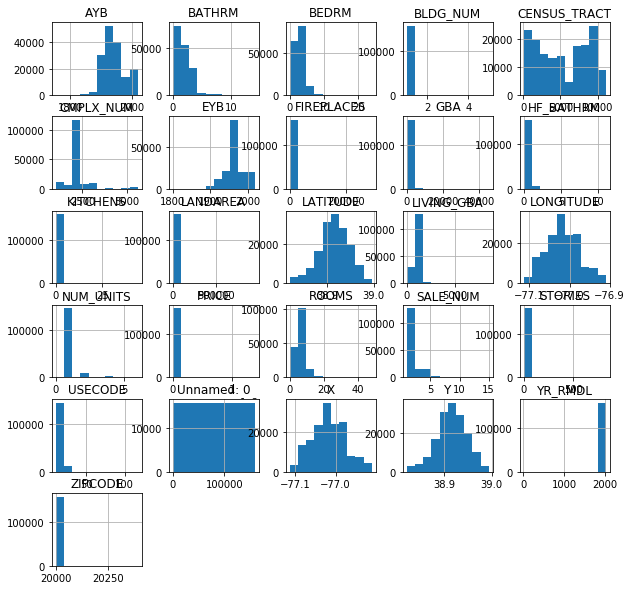

In [24]:
df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D0203AD208>,
      dtype=object)

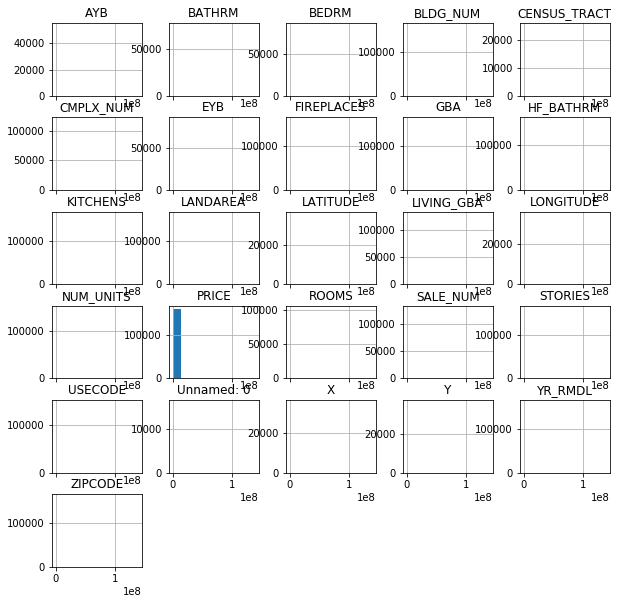

In [25]:
df.hist(figsize=(10,10), sharex=True)

In [26]:
df['PRICE'].head()

0    1.095000e+06
1    9.313516e+05
2    2.100000e+06
3    1.602000e+06
4    9.313516e+05
Name: PRICE, dtype: float64

In [27]:
#mean for the column
mean = df['PRICE'].mean()

#standard deviation of the column
std = df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (df['PRICE'] - mean)/std

In [28]:
mean, std

(931351.5949342768, 5550558.004606821)

In [29]:
price_z_manual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [30]:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(df[['PRICE']])

In [31]:
price_zscore.mean(), price_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [32]:
pri_z_col = pd.Series(price_zscore.reshape(-1))


In [33]:
pri_z_col.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

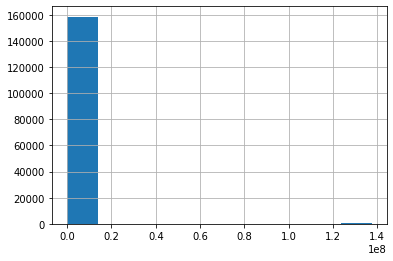

In [34]:
df['PRICE'].hist()

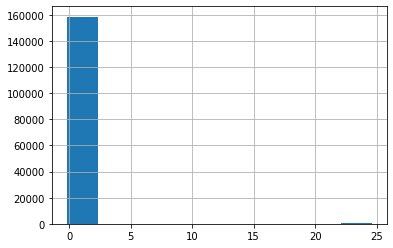

In [35]:
pri_z_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D026D4EA88>,
      dtype=object)

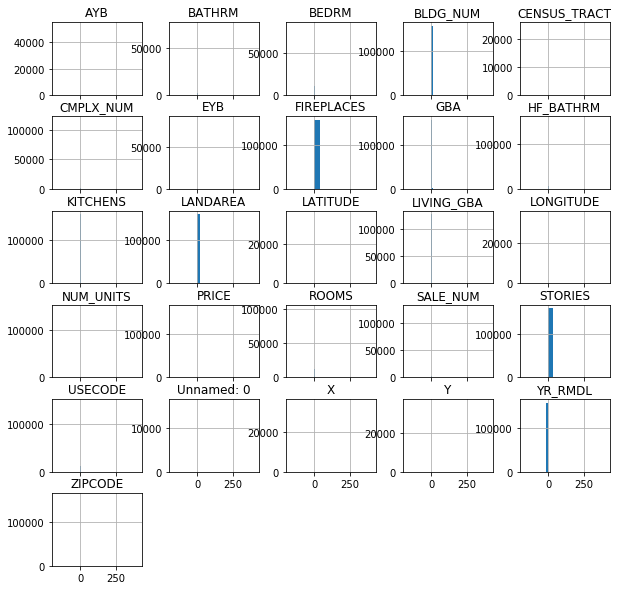

In [36]:
colnames = list(df.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(df), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

In [37]:
zscore_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,-1.732040,2.242255,-0.779886,1.639840,0.692191,0.932763,-0.951687,-0.866102,0.332302,0.377992,...,2.616136,-0.156805,0.0,4.718717e-16,-0.236422,-0.005477,-0.590054,-0.340458,-0.579847,0.001099
1,-1.732018,1.218077,0.922040,1.639840,1.838035,1.668674,-1.308709,0.740368,0.332302,0.377992,...,2.616136,-0.156805,0.0,4.718717e-16,-0.236422,-0.005380,-0.588404,-0.340458,-0.579847,0.001099
2,-1.731996,1.218077,0.922040,1.639840,1.074139,1.668674,-0.951687,0.909470,0.813783,0.377992,...,2.616136,-0.156805,0.0,4.718717e-16,-0.236422,-0.005373,-0.586288,-0.340458,-0.579847,0.001099
3,-1.731975,1.218077,0.922040,1.639840,0.692191,1.668674,-1.249205,0.402164,0.813783,0.377992,...,2.616136,-0.156805,0.0,4.718717e-16,-0.236422,-0.005404,-0.585094,-0.340458,-0.579847,0.001099
4,-1.731953,0.193899,0.922040,-0.404949,1.838035,0.196852,-0.862432,1.163123,0.853907,0.377992,...,-0.336310,-0.087227,0.0,4.718717e-16,-0.236422,-0.014852,-0.554127,-0.340458,-0.579847,0.001099


In [38]:
minmax_sc = MinMaxScaler()
price_minmax = minmax_sc.fit_transform(df[['PRICE']])
price_minmax.mean(), price_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [39]:
pri_mm_col = pd.Series(price_minmax.reshape(-1))
pri_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [40]:
pri_mm_col.min(), pri_mm_col.max()

(0.0, 0.9999999999999999)

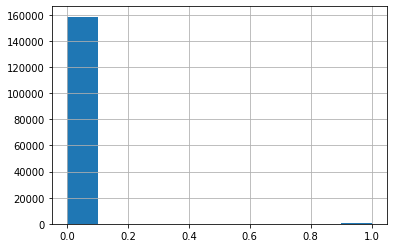

In [41]:
pri_mm_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D0294F3F48>,
      dtype=object)

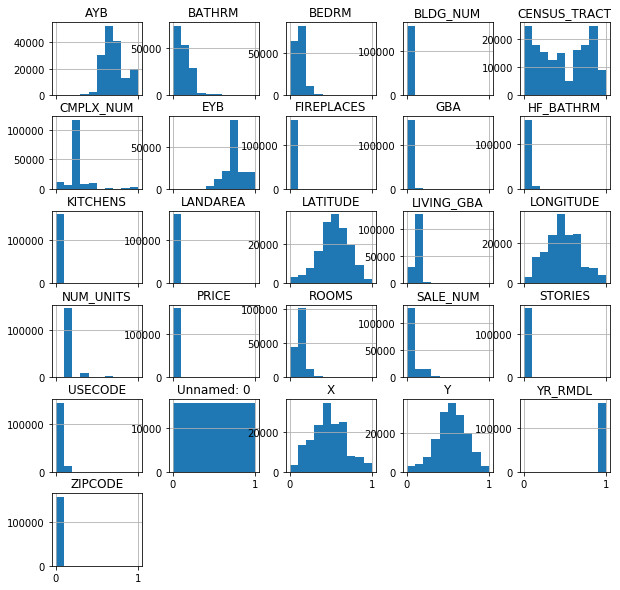

In [42]:
minmax_df = pd.DataFrame(minmax_sc.fit_transform(df), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)

In [43]:
minmax_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,0.000000,0.285714,0.000000,0.333333,0.166667,0.166667,0.588679,0.984492,0.788991,0.003632,...,0.122642,0.001782,0.296655,0.103921,0.02046,0.540070,0.357955,0.372818,0.358821,0.544894
1,0.000006,0.214286,0.090909,0.333333,0.229167,0.208333,0.543396,0.993997,0.788991,0.003632,...,0.122642,0.001782,0.296655,0.103921,0.02046,0.540088,0.358285,0.372818,0.358821,0.544894
2,0.000013,0.214286,0.090909,0.333333,0.187500,0.208333,0.588679,0.994997,0.844037,0.003632,...,0.122642,0.001782,0.296655,0.103921,0.02046,0.540089,0.358710,0.372818,0.358821,0.544894
3,0.000019,0.214286,0.090909,0.333333,0.166667,0.208333,0.550943,0.991996,0.844037,0.003632,...,0.122642,0.001782,0.296655,0.103921,0.02046,0.540084,0.358949,0.372818,0.358821,0.544894
4,0.000025,0.142857,0.090909,0.166667,0.229167,0.125000,0.600000,0.996498,0.848624,0.003632,...,0.018868,0.002156,0.296655,0.103921,0.02046,0.538379,0.365159,0.372818,0.358821,0.544894


In [44]:
minmax_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,...,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,0.500000,0.129334,0.041658,0.199673,0.128911,0.113854,0.709387,0.989617,0.751000,0.002532,...,0.030689,0.002624,0.296655,0.103921,0.029909,0.541059,0.476277,0.477111,0.475872,0.544693
std,0.288678,0.069743,0.053416,0.081508,0.054545,0.056619,0.126836,0.005917,0.114326,0.002909,...,0.035148,0.005367,0.138292,0.028169,0.039967,0.180438,0.200530,0.306330,0.201865,0.182921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.071429,0.000000,0.166667,0.083333,0.083333,0.618868,0.989617,0.706422,0.002421,...,0.000000,0.000739,0.296655,0.103921,0.015345,0.430546,0.347864,0.182000,0.347092,0.432519
50%,0.500000,0.142857,0.000000,0.166667,0.125000,0.125000,0.690566,0.989617,0.747706,0.002421,...,0.018868,0.001749,0.296655,0.103921,0.025575,0.543803,0.461974,0.463727,0.462234,0.546766
75%,0.750000,0.142857,0.090909,0.199673,0.145833,0.125000,0.777358,0.992496,0.802752,0.002532,...,0.056604,0.003183,0.296655,0.103921,0.043478,0.661763,0.613674,0.745636,0.613192,0.667287
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
